# Importing Modules and Checking Directory 

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
os.getcwd()


'/Users/Livi/Projects/Black_mental_health/models'

In [4]:
original_med = pd.read_csv('../data/processed/medicare18.csv', dtype={'full_zip':'object', 'npi':'object'}, index_col=0)

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
original_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115360 entries, 0 to 1115359
Data columns (total 24 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   npi                                  1115360 non-null  object 
 1   entity_code                          1115360 non-null  object 
 2   full_zip                             1115360 non-null  object 
 3   state                                1115360 non-null  object 
 4   country                              1115360 non-null  object 
 5   provider_type                        1115360 non-null  object 
 6   medicare_participation_indicator     1115360 non-null  object 
 7   number_of_hcpcs                      1115360 non-null  int64  
 8   number_of_services                   1115360 non-null  float64
 9   total_beneficiaries                  1115360 non-null  int64  
 10  total_submitted_charges              1115360 non-null  float64
 11

In [6]:
original_med.shape

(1115360, 24)

In [7]:
census = pd.read_csv('../data/processed/2018pops.csv', index_col = 0, dtype={'geo_id':'str'}, parse_dates=['do_date'])

In [8]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32799 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   geo_id                     32799 non-null  object        
 1   total_pop                  32799 non-null  int64         
 2   white_pop                  32799 non-null  int64         
 3   black_pop                  32799 non-null  int64         
 4   asian_pop                  32799 non-null  int64         
 5   hispanic_pop               32799 non-null  int64         
 6   amerindian_pop             32799 non-null  int64         
 7   other_race_pop             32799 non-null  int64         
 8   two_or_more_races_pop      32799 non-null  int64         
 9   do_date                    32799 non-null  datetime64[ns]
 10  percent_black              32799 non-null  float64       
 11  percent_white              32799 non-null  float64       
 12  perc

In [9]:
cols = ['geo_id', 'total_pop', 'percent_black', 'percent_white','percent_native_amer', 
        'percent_hispanic', 'percent_other','percent_asian', 'percent_two_or_more_races', 'majority']
keep_only = census.loc[:, cols]
keep_only.tail()

,geo_id,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
33115,35463,1794,0.323857,0.676143,0.000000,0.000000,0.000000,0.000000,0.000000,majority_white
33116,77664,2667,0.079865,0.828271,0.000000,0.069366,0.000000,0.009374,0.013123,majority_white
33117,21822,2013,0.169399,0.710879,0.017387,0.065574,0.000000,0.021361,0.015400,majority_white
33118,07418,2304,0.044271,0.904080,0.000000,0.043403,0.000000,0.008247,0.000000,majority_white
33119,03036,5039,0.003969,0.936098,0.000000,0.027783,0.006152,0.022028,0.003969,majority_white


In [10]:
original_med.full_zip.apply(len).value_counts(), census.geo_id.apply(len).value_counts()

(5    1115360
 Name: full_zip, dtype: int64,
 5    32799
 Name: geo_id, dtype: int64)

In [11]:
med = pd.merge(original_med, keep_only, how='left', left_on='full_zip', right_on='geo_id').drop(columns = 'geo_id')

In [12]:
original_med.shape, med.shape

((1115360, 24), (1115360, 33))

In [13]:
med.head()

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,subregion,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
0,1003000126,I,21502,MD,US,Internal Medicine,Y,19,1218.0,445,...,South Atlantic,42583.0,0.109645,0.839772,0.001573,0.018834,0.001127,0.007327,0.021464,majority_white
1,1003006586,I,20832,MD,US,Internal Medicine,Y,16,1293.0,546,...,South Atlantic,26448.0,0.108553,0.612523,0.003932,0.106360,0.006579,0.123299,0.038755,majority_white
2,1003006800,I,21202,MD,US,Physician Assistant,Y,4,58.0,12,...,South Atlantic,21010.0,0.579819,0.303475,0.002237,0.042075,0.006140,0.045740,0.017753,majority_black
3,1003007816,I,20910,MD,US,Ophthalmology,Y,30,3417.0,791,...,South Atlantic,42868.0,0.309042,0.448306,0.002659,0.135416,0.004689,0.067883,0.031539,no_majority
4,1003007824,I,21201,MD,US,Internal Medicine,Y,22,262.0,72,...,South Atlantic,17136.0,0.498833,0.337768,0.004260,0.039974,0.004785,0.079890,0.034022,no_majority


In [14]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115360 entries, 0 to 1115359
Data columns (total 33 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   npi                                  1115360 non-null  object 
 1   entity_code                          1115360 non-null  object 
 2   full_zip                             1115360 non-null  object 
 3   state                                1115360 non-null  object 
 4   country                              1115360 non-null  object 
 5   provider_type                        1115360 non-null  object 
 6   medicare_participation_indicator     1115360 non-null  object 
 7   number_of_hcpcs                      1115360 non-null  int64  
 8   number_of_services                   1115360 non-null  float64
 9   total_beneficiaries                  1115360 non-null  int64  
 10  total_submitted_charges              1115360 non-null  float64
 11

In [15]:
census.geo_id.isin(
    med[med.total_pop.isnull()].full_zip
        ).sum()

0

There may be new zip codes in 2018 Medicare that the 2018 Census estimates don't know about. Removing these rows with missing Census info.

In [16]:
idx = med[med.total_pop.isnull()].index
med.drop(index = idx, inplace=True)
med.shape

(1072142, 33)

Creating new classes based on 'percentage_rate' boxplot

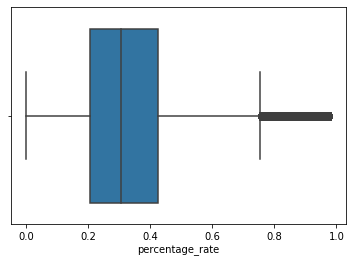

In [17]:
import seaborn as sns
sns.boxplot(med.percentage_rate)

Here are the quartiles and maximum.

In [18]:
first = np.quantile(med.percentage_rate, 0.25)
third = np.quantile(med.percentage_rate, 0.75)
high_cutoff = third + 1.5 * (third - first)
high_cutoff

0.7542883985915082

What do the "Payments Per Service" look like for high payrate doctors? I would guess they should be low, which might explain why Medicare would pay almost 100% of the charges.

In [19]:
med[med.percentage_rate > high_cutoff].medicare_payment_per_service.describe()

count    41116.000000
mean        43.870311
std        204.744295
min          0.580000
25%         35.880000
50%         39.370000
75%         44.210000
max      40140.400000
Name: medicare_payment_per_service, dtype: float64

Wow that is a very high maximum "Payment per service." Let's look at other high-rate, high-payment-per-service providers.

In [20]:
idx = med[med.percentage_rate > high_cutoff].index
med.loc[idx][med.loc[idx].medicare_payment_per_service > 1000]

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,subregion,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
288265,1184870230,O,94303,CA,US,Clinical Laboratory,Y,1,29116.0,24027,...,Pacific,48039.0,0.072941,0.242137,0.000354,0.399883,0.003081,0.183767,0.031703,no_majority
290297,1215003603,O,94063,CA,US,Clinical Laboratory,Y,6,27852.0,27007,...,Pacific,34503.0,0.022520,0.191925,0.001246,0.672434,0.005130,0.080109,0.017448,majority_hispanic
332951,1689607384,O,94005,CA,US,Clinical Laboratory,Y,2,13332.0,6241,...,Pacific,4692.0,0.060102,0.438832,0.000000,0.188406,0.006181,0.277067,0.029412,no_majority
346069,1821253584,O,92618,CA,US,Clinical Laboratory,Y,2,3107.0,2710,...,Pacific,43316.0,0.026318,0.420191,0.001662,0.080525,0.005564,0.424070,0.041647,no_majority
532685,1144203613,I,11050,NY,US,Oral Surgery (Dentist only),Y,2,25.0,17,...,Middle Atlantic,30132.0,0.015366,0.696535,0.001925,0.155283,0.001460,0.119673,0.009392,majority_white
687391,1922019561,O,48103,MI,US,Pharmacy,Y,11,286.2,37,...,East North Central,55403.0,0.046604,0.770410,0.005216,0.036857,0.001336,0.097648,0.041929,majority_white
803606,1508105024,O,98102,WA,US,Clinical Laboratory,Y,1,57.0,57,...,Pacific,25448.0,0.022124,0.738211,0.002240,0.044483,0.001611,0.127908,0.060083,majority_white
874560,1447774641,O,27709,NC,US,Clinical Laboratory,Y,1,42.0,42,...,South Atlantic,914.0,0.214442,0.657549,0.000000,0.015317,0.000000,0.053611,0.059081,majority_white
911524,1548476252,I,38664,MS,US,Family Practice,Y,20,124.0,41,...,East South Central,3074.0,0.787573,0.158100,0.000000,0.016916,0.000000,0.037411,0.000000,majority_black
985666,1518982479,O,68901,NE,US,Pharmacy,Y,1,74.0,26,...,West North Central,26203.0,0.006640,0.844025,0.002786,0.116208,0.000000,0.013510,0.016487,majority_white


Interesting. A few California-based Clinical Laboratories and some other provders. A few white-majority zip codes. 

Creating payrate_level classes. Low is in the first quartile. Medium is in the IQR. High is in the fourth quartile. Very High includes the high outliers.

In [21]:
med['payrate_level'] = 'xx'
med.loc[med.percentage_rate < first, 'payrate_level'] = 'low'
med.loc[med.percentage_rate >= first, 'payrate_level'] = 'medium'
med.loc[med.percentage_rate >= third, 'payrate_level'] = 'high'
med.loc[med.percentage_rate >= high_cutoff, 'payrate_level'] = 'very high'

In [22]:
med.payrate_level.value_counts()

medium       536070
low          268036
high         226920
very high     41116
Name: payrate_level, dtype: int64

In [23]:
med.columns

Index(['npi', 'entity_code', 'full_zip', 'state', 'country', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'number_of_services', 'total_beneficiaries', 'total_submitted_charges',
       'total_allowed_payment', 'total_medicare_payment',
       'total_medicare_standardized_payment', 'avg_beneficiary_age',
       'avg_hcc_risk_score', 'medicare_payment_per_person',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'medicare_payment_per_service',
       'percentage_rate', 'region', 'subregion', 'total_pop', 'percent_black',
       'percent_white', 'percent_native_amer', 'percent_hispanic',
       'percent_other', 'percent_asian', 'percent_two_or_more_races',
       'majority', 'payrate_level'],
      dtype='object')

Determining Collinearity Between Features. Not important for classification, but it might affect my interpretation of results.

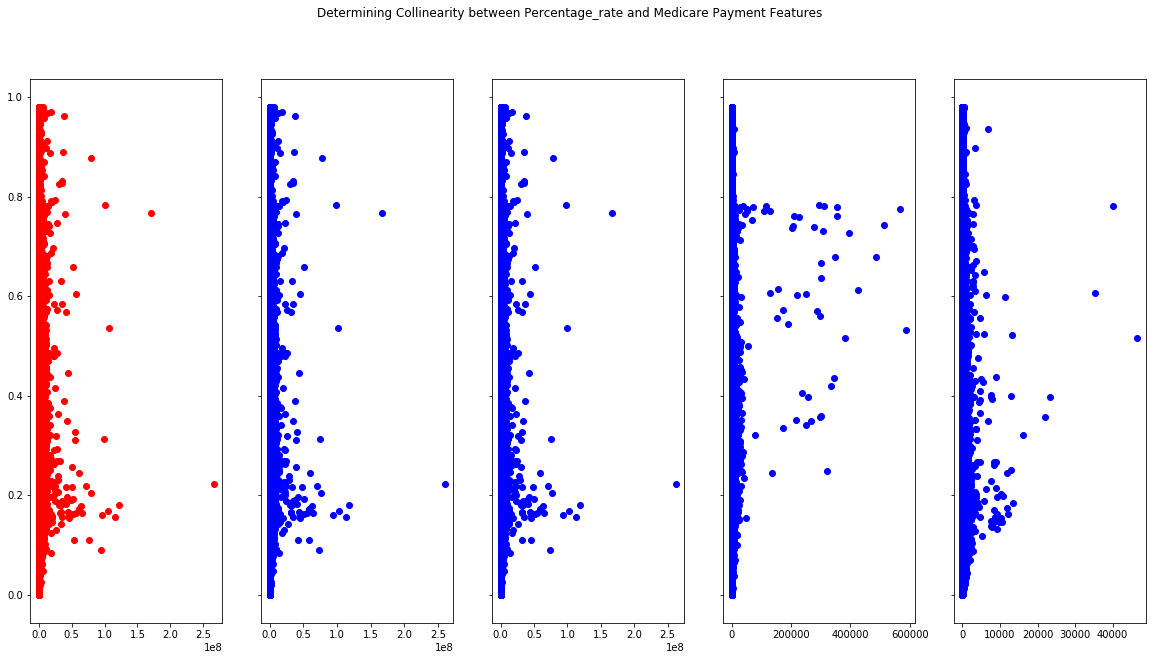

In [24]:
f, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize=(20, 10))
ax1.scatter('total_allowed_payment', 'percentage_rate', data=med, color='red', label='black');

ax2.scatter('total_medicare_payment', 'percentage_rate', data=med, color='blue', label='white');
ax3.scatter('total_medicare_standardized_payment', 'percentage_rate', data=med, color='blue', label='white');
ax4.scatter('medicare_payment_per_person', 'percentage_rate', data=med, color='blue', label='white');
ax5.scatter('medicare_payment_per_service', 'percentage_rate', data=med, color='blue', label='white');




f.suptitle('Determining Collinearity between Percentage_rate and Medicare Payment Features');
#ax1.set(xlabel='Black Deaths',ylabel='Total Deaths');
#ax2.set(xlabel='White Deaths')
#ax3.set(xlabel = 'Hispanic Deaths')
plt.show()

I want to focus only on the percentage Medicare paid of the submitted charges to look for patterns in this rate that may have unintended correlations with demographics. Leaving actual payments in will make the model too good at predicting payrates.

In [25]:
med.columns[med.columns.str.contains('medicare')]

Index(['medicare_participation_indicator', 'total_medicare_payment',
       'total_medicare_standardized_payment', 'medicare_payment_per_person',
       'medicare_payment_per_service'],
      dtype='object')

In [26]:
cols = list(med.columns[med.columns.str.contains('medicare')][1:])
cols = cols + ['npi','country', 'percentage_rate']
df = med.drop(columns = cols)
df.columns

Index(['entity_code', 'full_zip', 'state', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'number_of_services', 'total_beneficiaries', 'total_submitted_charges',
       'total_allowed_payment', 'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'region', 'subregion', 'total_pop',
       'percent_black', 'percent_white', 'percent_native_amer',
       'percent_hispanic', 'percent_other', 'percent_asian',
       'percent_two_or_more_races', 'majority', 'payrate_level'],
      dtype='object')

Taking out zips before I one-hot-encode. Keeping them in may be useful for controlling for location / cost of living, but will also increase performance time.

In [27]:
y = df['payrate_level']
X = pd.get_dummies(df.drop(columns=['payrate_level','full_zip']))

In [28]:
X.columns = X.columns.str.replace('majority_majority_', 'majority_').str.replace('majority_no_', 'no_')
X.columns

Index(['number_of_hcpcs', 'number_of_services', 'total_beneficiaries',
       'total_submitted_charges', 'total_allowed_payment',
       'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service',
       ...
       'subregion_Pacific', 'subregion_South Atlantic',
       'subregion_West North Central', 'subregion_West South Central',
       'majority_asian', 'majority_black', 'majority_hispanic',
       'majority_native_amer', 'majority_white', 'no_majority'],
      dtype='object', length=191)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [30]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

rf = RandomForestClassifier(n_jobs=-1)

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv = cross_val_score(rf, X_train[:10000], y_train[:10000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score:', rf_cv)
print("Time:", total/60, "minutes")

CV F1 Score: [0.76196882 0.75392858 0.75444393 0.74812095 0.76227607]
Time: 0.9018056472142537 minutes


In [31]:
# With 100,000 samples in X_train: CV F1 Score: [0.81761714 0.81615792 0.82171095 0.82214405 0.8191265 ]

Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc= cross_val_score(gbc,X_train[:10000],y_train[:10000],cv=5,scoring=scorer, n_jobs=-1)


end = time.time()

print ('CV F1 Scores:', cv_scores_gbc)
print('Time:', (end-start)/60)

CV F1 Scores: [0.8310602  0.82652227 0.81033423 0.8138048  0.83373141]
Time: 1.4289013981819152


Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr = cross_val_score(lr,X_train[:10000],y_train[:10000],cv=5,scoring=scorer, n_jobs=-1)

end = time.time()

print ('CV F1 Scores:', cv_scores_lr)
print('Time:', (end-start)/60)

CV F1 Scores: [0.90407242 0.89289483 0.90440503 0.8910108  0.90894336]
Time: 1.5082992990811666


SVC

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import time

start = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

svc = SVC(kernel='linear')
scorer = make_scorer(f1_score, average = 'weighted')
svc_cv = cross_val_score(svc, X_train[:1000], y_train[:1000], cv=5, scoring = scorer, n_jobs=-1)

end = time.time()

print(svc_cv)
print('Time:', (end-start)/60, 'minutes')


This code took too long to run. Considering the other models did quite well, it's not worth the computation time.

In [42]:
pd.DataFrame({'models':['Random Forest','Gradient Boosting','Logistic Regression'],
             'Mean CV F1 Scores': [rf_cv.mean(), cv_scores_gbc.mean(), cv_scores_lr.mean()]})

,models,Mean CV F1 Scores
0,Random Forest,0.756148
1,Gradient Boosting,0.823091
2,Logistic Regression,0.900265


Without any hyperparameter tuning my best model was the Logistic Regression with 90%. In another preprocessing notebook, the Logistic Regression model also performed best with addition Medicare-Payment columns (which I left out here because of possible collinearity) at 99%. 

Because the ratio of Medicare payment to Submitted charges actually tells whether the client is low rate, medium rate or high rate, I prefer to leave these out. I'm not sure if the models can "figure out" that relationship or not. 

My goal is actually to have a pretty good model that has a few mistakes because these mistakes are just as telling as the ability of the model to correctly identify classes. 

On that note, I am interested in the F1 Score particularly for the "very high" class and "low" class because I want to know whether the model falsely labels high-rate providers as low or vice versa. That said, maybe I don't want to optimize for "low" class F1 Score but rather the OVERALL F1 score. If a model is generally very accurate but still mislabels some outliers, those outliers may be worth re-examining. 

Overall, my modeling notebook will focus most heavily of feature importances and tables that contain the extreme outliers: low rate providers labeled as 'very high' and very high rate providers labeled as very low. I want to see if these providers show a pattern. 

If they do seem fishy, a final iteration of modeling may be one that labels these outliers as "wrongly compensated" and trains on the data to look for other potential "wrongly compensated" providers. 

I didn't scale my date before modeling here, both because I may want to say that for the "modeling" stage since my initial performances were good and because the combination of binary and continuous variables may complicate that process. 